In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import os

In [18]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
with open('crawler\config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Branch data


## Load data


In [3]:
Brands_data = pd.read_csv(os.path.join(
    config['SavePath'], config['BrandsListFileName'] + ".csv"))

In [4]:
Brands_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BrandName      121 non-null    object
 1   NumberOfPhone  121 non-null    int64 
 2   BrandUrl       121 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


## Inspection


In [9]:
def inspect_data(data):
    dataCols = data.columns
    NullSum = data.isnull().sum()
    UniqueSum = data.nunique()
    ColType = data.dtypes
    # nsamples = 5
    # Samples = [', '.join([str(data[col][i]) for i in range(nsamples)]) for col in data.columns]
    n_UniqueSample = 5
    UniqueSamples = [', '.join([str(data[col].unique()[i]) for i in range(n_UniqueSample if len(
        data[col].unique()) > n_UniqueSample else len(data[col].unique()))]) for col in data.columns]

    Inspec = pd.DataFrame({'Column': dataCols, 'NullSum': NullSum,
                          'UniqueSum': UniqueSum, 'Type': ColType, 'Unique Sample': UniqueSamples})
    Inspec.index = [i for i in range(1, len(data.columns)+1)]
    return Inspec

In [13]:
display(inspect_data(Brands_data))

,Column,NullSum,UniqueSum,Type,Unique Sample
1,BrandName,0,121,object,"Acer, alcatel, Allview, Amazon, Amoi"
2,NumberOfPhone,0,84,int64,"100, 409, 157, 25, 47"
3,BrandUrl,0,121,object,"https://www.gsmarena.com/acer-phones-59.php, h..."


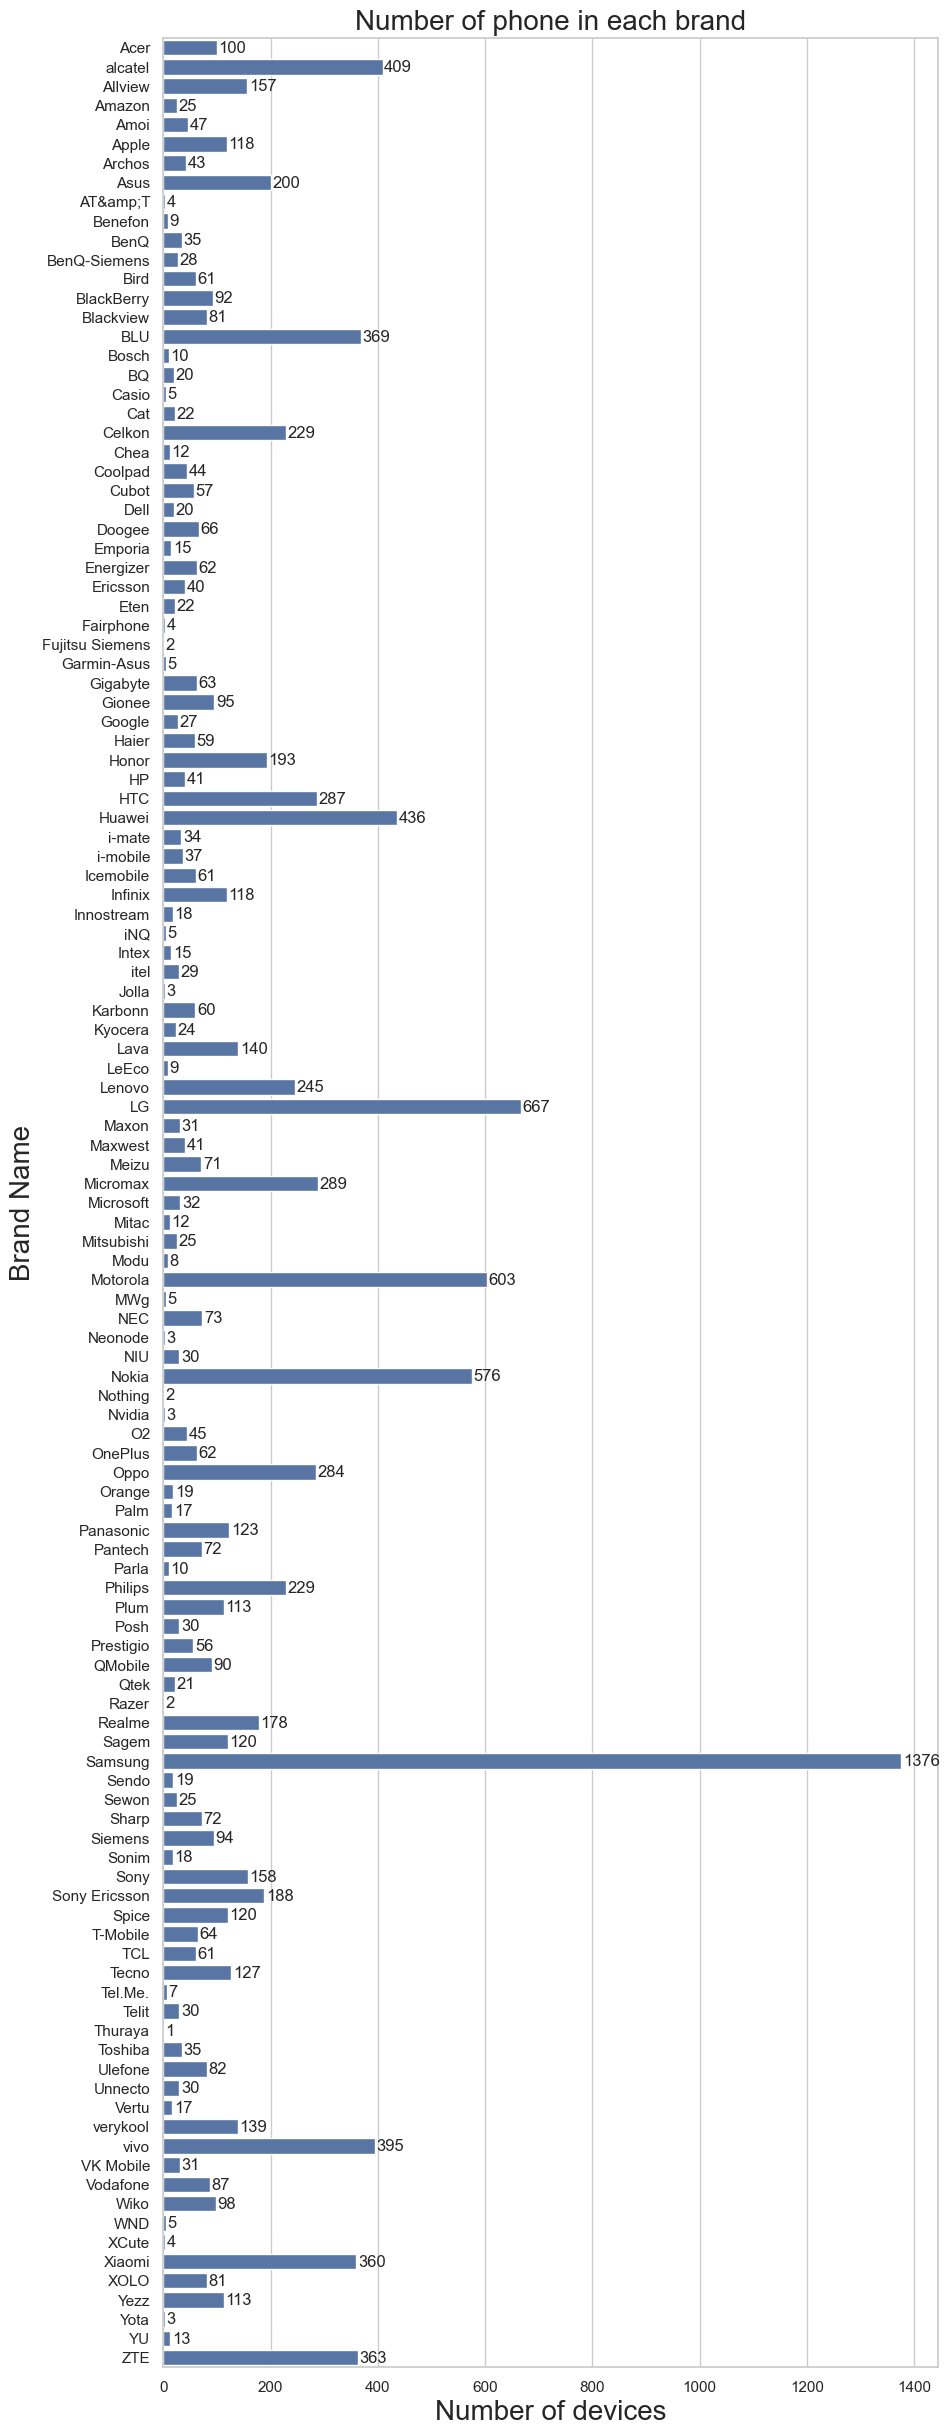

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, len(Brands_data)/4))
ax = sns.barplot(x="NumberOfPhone", y="BrandName", data=Brands_data)
plt.title('Number of phone in each brand', fontsize=20)
plt.xlabel('Number of devices', fontsize=20)
plt.ylabel('Brand Name', fontsize=20)
# add numbers on each bars
for i, v in enumerate(Brands_data['NumberOfPhone']):
    ax.text(v + 3, i + .25, str(v))
plt.show()

In [5]:
print('Total number of devieces: ', Brands_data['NumberOfPhone'].sum())

Total number of devieces:  12570


# Devices url data


## Load data


In [6]:
Devices_url = pd.read_csv(os.path.join(
    config['SavePath'], config['AllDevicesUrlsFileName'] + ".csv"))

In [7]:
Devices_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  12515 non-null  object
 1   DeviceUrl  12515 non-null  object
dtypes: object(2)
memory usage: 195.7+ KB


## Inspection


In [10]:
inspect_data(Devices_url)

,Column,NullSum,UniqueSum,Type,Unique Sample
1,BrandName,0,121,object,"Acer, alcatel, Allview, Amazon, Amoi"
2,DeviceUrl,0,12515,object,https://www.gsmarena.com/acer_chromebook_tab_1...


In [23]:
# count number of links in each brand
def compareNumberOfLinkWithNumberOfPhone(BrandsData, DevicesUrl):
    com = {
        'BrandName': [],
        'NumberOfPhone': [],
        'NumberOfLink': [],
        'Match': [],
        'MissMatchCount': []
    }
    for i in range(len(BrandsData)):
        com['BrandName'].append(BrandsData['BrandName'][i])

        # get number of phone in each brand
        NumOfPhone = BrandsData['NumberOfPhone'][i]
        com['NumberOfPhone'].append(NumOfPhone)

        # count number of brandname appear in Devices_url
        NumOfLink = Devices_url['BrandName'].value_counts()[
            BrandsData['BrandName'][i]]
        com['NumberOfLink'].append(NumOfLink)

        # compare number of phone and number of link, if match then True, else False
        com['Match'].append(NumOfLink == NumOfPhone)

        # count number of miss match
        com['MissMatchCount'].append(NumOfPhone - NumOfLink)

    return pd.DataFrame(com)


com = compareNumberOfLinkWithNumberOfPhone(Brands_data, Devices_url)
# get Brands that have number of phone not match with number of link
BrandsNotMatch = com[com['Match'] == False]
display(BrandsNotMatch)

,BrandName,NumberOfPhone,NumberOfLink,Match,MissMatchCount
1,alcatel,409,400,False,9
14,Blackview,81,80,False,1
40,Huawei,436,434,False,2
44,Infinix,118,117,False,1
54,Lenovo,245,240,False,5
55,LG,667,660,False,7
64,Motorola,603,600,False,3
74,Oppo,284,280,False,4
87,Realme,178,177,False,1
89,Samsung,1376,1360,False,16
